# **ChemRiskPredict Showcase**
https://github.com/mwolfe03/ChemRiskPredict

## Installation:

In [ ]:
import pandas as pd

In [ ]:
!git clone https://github.com/mwolfe03/ChemRiskPredict.git
%cd ChemRiskPredict

Cloning into 'ChemRiskPredict'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 103 (delta 59), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (103/103), 292.07 KiB | 3.89 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ChemRiskPredict


In [ ]:
!pip install -U git+https://github.com/mwolfe03/ChemRiskPredict.git
%cd ChemRiskPredict

  Cloning https://github.com/mwolfe03/ChemRiskPredict.git to /tmp/pip-req-build-39bge5ia
  Running command git clone --filter=blob:none --quiet https://github.com/mwolfe03/ChemRiskPredict.git /tmp/pip-req-build-39bge5ia
  Resolved https://github.com/mwolfe03/ChemRiskPredict.git to commit 6bcf80d57b911bc92060f41b4f08ec5f019345ec
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 8.8 MB/s eta 0:00:00
  Created wheel for ChemRiskPredict: filename=ChemRiskPredict-1.0.0-py3-none-any.whl size=1269 sha256=35792d4628ec00cdfe94dd50baf4dfc1e29b8e4a4d2a635d90aa0099701298b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-vhuasvnz/wheels/de/cb/45/173ab6797cb4582d108c6016a3a7cd497ee08ef29081d99504
Successfully built ChemRiskPredict
[Errno 2] No such file or directory: 'ChemRiskPredict'
/content/ChemRiskPredict


In [ ]:
import ChemRiskPredict as chemrp

## Hazard prediction:

Hazards can be predicted using chemrp.*determine_potential_hazards_from_dataframe()*

In [ ]:
SMILES_string = "CC1CCC2(C(C3C(O2)CC4C3(C(=O)CC5C4CCC6C5(CCC(C6)OC(=O)C)C)C)C)OC1"

chemrp.determine_potential_hazards_from_dataframe(canonical_smiles=SMILES_string,
                                                  # Default parameters
                                                  main_df=chemrp.default_data_df,
                                                  min_probability=.3,
                                                  num_neighbors=5,
                                                  algorithm="auto",
                                                  metric="cosine")

,AcuteToxic,Flammable,HealthHazard,Corrosive,EnvironmentalHazard
0,0,0,1,0,0


In [ ]:
SMILES_string = "CC1CCC2(C(C3C(O2)CC4C3(C(=O)CC5C4CCC6C5(CCC(C6)OC(=O)C)C)C)C)OC1"

chemrp.determine_potential_hazards_from_dataframe(canonical_smiles=SMILES_string)

,AcuteToxic,Flammable,HealthHazard,Corrosive,EnvironmentalHazard
0,0,0,1,0,0


## Prediction Model Testing

Models/parameters can be tested using chemrp.*hazard_model_testing()*

In [ ]:
                                                # Default parameters
prediction_info_1 = chemrp.hazard_model_testing(testing_df=chemrp.default_testing_data_df,
                                                main_df=chemrp.default_data_df,
                                                min_probability=.3,
                                                num_neighbors=5,
                                                algorithm="auto",
                                                metric="cosine")
prediction_info_1.head()

,Statistic,AcuteToxic,Flammable,HealthHazard,EnvironmentalHazard,Corrosive
0,Correct Prediction Proportion,0.671875,0.851562,0.632812,0.734375,0.710938
1,False Positive Proportion,0.179688,0.085938,0.242188,0.148438,0.140625
2,False Negative Proportion,0.148438,0.062500,0.125000,0.117188,0.148438


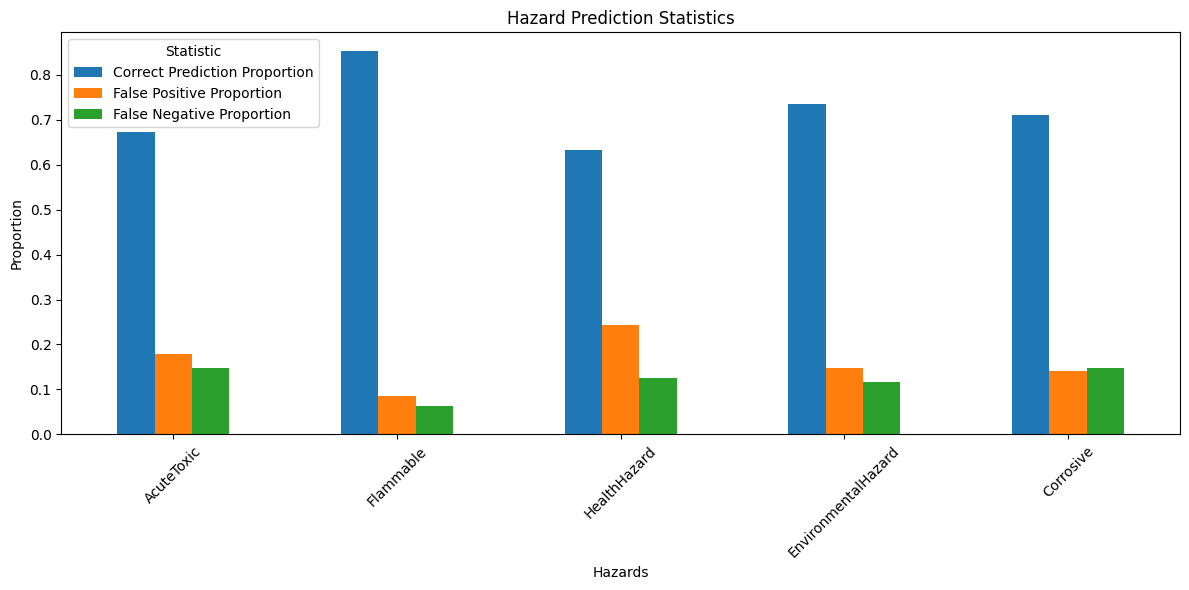

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the index to 'Statistic'
prediction_info_1.set_index('Statistic', inplace=True)

# Plot the data
prediction_info_1.T.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Hazard Prediction Statistics')
plt.xlabel('Hazards')
plt.ylabel('Proportion')
plt.legend(title='Statistic')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
prediction_info_2 = chemrp.hazard_model_testing()
prediction_info_2

,Statistic,AcuteToxic,Flammable,HealthHazard,EnvironmentalHazard,Corrosive
0,Correct Prediction Proportion,0.671875,0.851562,0.632812,0.734375,0.710938
1,False Positive Proportion,0.179688,0.085938,0.242188,0.148438,0.140625
2,False Negative Proportion,0.148438,0.062500,0.125000,0.117188,0.148438


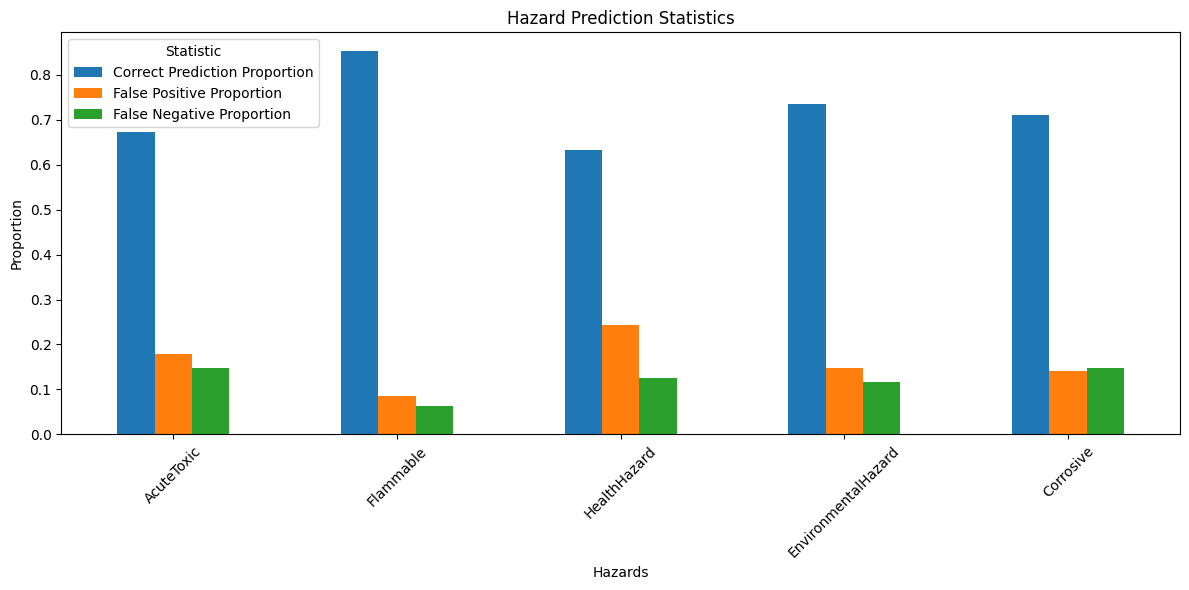

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the index to 'Statistic'
prediction_info_2.set_index('Statistic', inplace=True)

# Plot the data
prediction_info_2.T.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Hazard Prediction Statistics')
plt.xlabel('Hazards')
plt.ylabel('Proportion')
plt.legend(title='Statistic')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Building DataFrames and updating dataframes

DataFrames containing hazard data can be pulled from pubchem's pug_view API with a list of of compound IDs using chemrp.*create_dataframe_from_cids()*. Molecules that do not have any hazards are dropped as there is no way to differentiate molecules that are "safe" from molecules that just don't have any known hazard data.

In [ ]:
compound_IDs = [1, 89, 991, 12321, 445, 120, 62706165, 2764, 8471, 1548953]

compound_data_df = chemrp.create_dataframe_from_cids(compound_IDs= compound_IDs,
                                                     # Default parameters
                                                     save_to_csv=True,
                                                     csv_name='compound_data.csv',
                                                     wait_time=1,
                                                     drop_empty_hazard_rows=True)

compound_data_df

,Compound ID,IUPAC Name,Canonical SMILES,Hazards,,AcuteToxic,HealthHazard,EnvironmentalHazard,Irritant,Flammable,...,8ba3aa5bcbc34afbc9028a9b8b38c4ed,ee77e76923b7d3816d54d51dd55d54a8,39ab00f9bd8e2ad87f2d91067c1ad998,8d0640f138b5ed667dfcd29d68d0d675,aed049c4678eef17d9a6acd35ece4e01,a4bfb69f24235e1758cf8ef5e7233b3e,367616bc9f9418c9dab75770686a6dca,094f813da0606090029de2446a095994,6a02b3eca54c80f3588bb829983ae4a5,fa43d32e58d7f72410e28f62e7eba327
2,991,diethoxy-(4-nitrophenoxy)-sulfanylidene-λ5-pho...,CCOP(=S)(OCC)OC1=CC=C(C=C1)[N+](=O)[O-],"Acute Toxic, Health Hazard, Environmental Haza...",0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2764,1-cyclopropyl-6-fluoro-4-oxo-7-piperazin-1-ylq...,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,Irritant,0,0,0,0,1,0,...,0,0,0,1,1,1,1,0,0,0
8,8471,"N,N-diethylethanamine",CCN(CC)CC,"Flammable, Corrosive, Acute Toxic, Irritant, F...",0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
compound_IDs_2 = [1000, 1312, 2322, 9090, 1211, 7823, 7582, 10402, 9888, 8888]

compound_data_2_df = chemrp.create_dataframe_from_cids(compound_IDs= compound_IDs_2)
compound_data_2_df

,Compound ID,IUPAC Name,Canonical SMILES,Hazards,Irritant,,Corrosive,EnvironmentalHazard,AcuteToxic,HealthHazard,...,45bf58b61b2527f7b72f5a3ef16e0244,aed049c4678eef17d9a6acd35ece4e01,07c711694a423d19dee643452e535996,a497af76fc22fbbc8b13061957b15c09,ce2a7c1e7c01ed42134f9a21eb00a1ee,cc9065153f4d90aa61923dc6f94272ba,58aceb296d2a12255aa86306ded40880,442c2f63d7197ce15c1a2672c68a569f,94a3961e741abc0a1d191d0602474306,6103363abfd3938a92e47a6ca3be576a
0,1000,2-amino-1-phenylethanol,C1=CC=C(C=C1)C(CN)O,Irritant,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7823,"hexane-1,2,6-triol",C(CCO)CC(CO)O,Irritant,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,7582,N-cyclohexylcyclohexanamine,C1CCC(CC1)NC2CCCCC2,"Corrosive, Irritant, Environmental Hazard, Cor...",1,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
7,10402,"3,7-dimethyloct-6-enoic acid",CC(CCC=C(C)C)CC(=O)O,Acute Toxic,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Updating DataFrames With Existing DataFrames:**

pd.DataFrames created using chemrp.*create_dataframe_from_cids()* can be updated/combined with another pd.DataFrame using chemrp.*update_existing_dataframe_from_dataframe()*

In [ ]:
chemrp.update_existing_dataframe_from_dataframe(main_df=compound_data_2_df,
                                                second_df=compound_data_df,
                                                # Default parameters
                                                save_to_csv=True,
                                                csv_name="compound_data.csv",
                                                overwrite_old_data=False)

,,07c711694a423d19dee643452e535996,094f813da0606090029de2446a095994,0961e94c25ef2d6fea2522216afc4a19,0abe13b29a77603c9931e429fdaee642,0c1db0ac2e8e1b5a3e6b4066cba7beea,35a74a09f8c89707b7dcfb5bb1f07988,367616bc9f9418c9dab75770686a6dca,39ab00f9bd8e2ad87f2d91067c1ad998,442c2f63d7197ce15c1a2672c68a569f,...,ce2a7c1e7c01ed42134f9a21eb00a1ee,could_not_collect_grouping_data,d0a4ed3eac3b36bcfa3567bf6398bba9,d5146d383f4f0f70d1f3019ffc881a8d,d67dcd055e5fe8befabed44ae8162006,d760055f2a5451e84a79b8f77131eda3,ee77e76923b7d3816d54d51dd55d54a8,ef23b47eea82a7d34c0fc82c74fbd1a0,f14cbc73ef102f56e7e643fd870151ad,fa43d32e58d7f72410e28f62e7eba327
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,1,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
